In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns

# Load the dataset

In [11]:
# Load the CSV 
file_path = 'phishing.csv'
phishingData = pd.read_csv(file_path)

# Display 
phishingData.head()

,_id,assets_downloaded,brands,domain,features.css,features.html,features.text,folder_path,language,protocol,...,security_valid_from,security_valid_to,url,whois_domain_age,whois_raw_text,whois_registrar,whois_registrar_url,whois_registry_created_at,whois_registry_expired_at,whois_registry_updated_at
0,64038b0e2e9df665fc7353ff,0.700000,"[""microsoft""]",compactdrivesolu.blob.core.windows.net,"{""box-sizing"": [""inherit"", ""border-box""], ""mar...","[""html"", ""head"", ""meta"", ""title"", ""style"", ""li...",\n Sharing Link Validation\n \n Verify Your Id...,phishing/64038b0e2e9df665fc7353ff,en,http/1.1,...,2022-12-23T11:53:59.000Z,2023-12-23T11:53:59.000Z,https://compactdrivesolu.blob.core.windows.net...,10067.0,Domain Name: WINDOWS.NET\r\n Registry Dom...,NaN,http://www.markmonitor.com,1995-08-10T04:00:00.000Z,2023-06-04T16:06:16.000Z,2022-05-09T19:17:07.000Z
1,640393d7a8281bcf8be471a4,0.857143,"[""microsoft""]",bafkreifefpvr26zfog4s27pxbtd3tqmtatd34e374cvv4...,"{""margin"": [""0""], ""font-family"": [""Raavi"", ""Mi...","[""html"", ""head"", ""script"", ""meta"", ""title"", ""m...",\n Sign in to your account\n \n Sign in\n \n E...,phishing/640393d7a8281bcf8be471a4,en,h2,...,2023-01-10T17:16:24.000Z,2023-04-10T17:16:23.000Z,https://bafkreifefpvr26zfog4s27pxbtd3tqmtatd34...,2199.0,Domain Name: dweb.link\r\nRegistry Domain ID: ...,NaN,www.cscglobal.com,2017-02-24T01:05:26.675Z,2024-02-24T01:05:26.675Z,2023-01-23T21:09:56.296Z
2,640394d3a8281bcf8be471a8,0.500000,"[""ups""]",ups-trackid728912.is-certified.com,"{""box-sizing"": [""border-box""], ""text-rendering...","[""html"", ""head"", ""meta"", ""title"", ""meta"", ""met...",\n Global Shipping & Logistics Services | UPS ...,phishing/640394d3a8281bcf8be471a8,en,http/1.1,...,NaN,NaN,http://ups-trackid728912.is-certified.com/Find...,5901.0,Domain Name: IS-CERTIFIED.COM\r\n Registr...,NaN,http://www.tucows.com,2007-01-04T14:10:49.000Z,2024-01-04T14:10:49.000Z,2022-12-06T06:48:20.000Z
3,64039cc2a8281bcf8be471b5,1.000000,"[""microsoft""]",southcoastaletrail.net.au,"{""height"": [""44px"", ""100%"", ""24px"", ""40px"", ""3...","[""html"", ""head"", ""meta"", ""title"", ""link"", ""bod...",\n Sharing Link Validation\n \n Onedrive\n \n ...,phishing/64039cc2a8281bcf8be471b5,en,h2,...,2022-10-20T00:00:00.000Z,2023-10-30T23:59:59.000Z,https://southcoastaletrail.net.au/original/tec...,NaN,WHOIS LIMIT EXCEEDED\n,NaN,NaN,NaN,NaN,NaN
4,6403a15fa8281bcf8be471c4,1.000000,"[""dhl""]",sksadesign.com,"{""width"": [""55px"", ""7px"", ""240px"", ""360px"", ""4...","[""html"", ""head"", ""meta"", ""meta"", ""title"", ""lin...",\n DHL\n \n 專業及可靠的付運服務\n \n 客户服务\n \n 全天候24小時客...,phishing/6403a15fa8281bcf8be471c4,ko,http/1.1,...,2023-01-16T04:36:30.000Z,2023-04-16T04:36:29.000Z,https://sksadesign.com/@/GlobalSources/,3665.0,Domain Name: SKSADESIGN.COM\r\n Registry ...,NaN,http://www.publicdomainregistry.com,2013-01-17T06:47:49.000Z,2024-01-17T06:47:49.000Z,2022-12-19T06:11:52.000Z


In [12]:
column_names = phishingData.columns

print(column_names) 

Index(['_id', 'assets_downloaded', 'brands', 'domain', 'features.css',
       'features.html', 'features.text', 'folder_path', 'language', 'protocol',
       'remote_ip_address', 'remote_ip_asn', 'remote_ip_country',
       'remote_ip_domain', 'remote_ip_isp', 'remote_ip_isp_org', 'scan_date',
       'security_issuer', 'security_protocol', 'security_state',
       'security_valid_from', 'security_valid_to', 'url', 'whois_domain_age',
       'whois_raw_text', 'whois_registrar', 'whois_registrar_url',
       'whois_registry_created_at', 'whois_registry_expired_at',
       'whois_registry_updated_at'],
      dtype='object')


In [4]:
# Display the number of rows and columns in the dataset
rows, columns = phishingData.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 5151
Number of columns: 30


The dataset contains various columns that could potentially be used to derive or analyze phishing detection metrics, response rates, and false positives. Here are a few recommendations based on your metrics:

**Detection Rate:**

Column: assets_downloaded (as a possible proxy to understand if users interacted with phishing assets).

**Response Rate:**

Column: protocol and features.text might help categorize user or system responses based on interactions and observed behavior.


**False Positive Rate:**

Column: domain and features.html to identify discrepancies between expected content and actual content, aiding in false positive analysis.


**User Demographics:**

Column: This data does not directly include demographics like age or gender. If available in a related dataset, it could be merged for further insights.

**Device Type Usage:**

Column: protocol and folder_path can sometimes infer the type of device or OS, though this would need additional device-specific columns for accurate determination.

In [ ]:
# TO PREDICT THE DETECTION RATE

## TASK 1

**Detection Rate**

assets_downloaded (as a possible proxy to understand if users interacted with phishing assets). 

**NOTE**

From the dataset i can't find detection column so i set a threshold =  0.5 

In [ ]:
# Check for missing values in 'assets_downloaded' column and drop those rows
phishingData = phishingData.dropna(subset=['assets_downloaded'])

# Define a threshold to approximate detection
threshold = 0.5 
phishingData['Detection'] = phishingData['assets_downloaded'].apply(lambda x: 1 if x > threshold else 0)

# Feature and target variable
X = phishingData[['assets_downloaded']]
y = phishingData['Detection']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9990300678952473
Confusion Matrix:
 [[327   0]
 [  1 703]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       327
           1       1.00      1.00      1.00       704

    accuracy                           1.00      1031
   macro avg       1.00      1.00      1.00      1031
weighted avg       1.00      1.00      1.00      1031




## TASK 2

**Response Rate:**

Column: protocol and features.text might help categorize user or system responses based on interactions and observed behavior.


In [21]:
# Check for missing values
phishing_data = phishingData.dropna(subset=['protocol', 'features.text'])

# Define function to categorize response based on `protocol` and `features.text`
def categorize_response(row):
    # Example condition: Use HTTPS protocol as a proxy for more secure interactions
    if "https" in row['protocol'].lower():
        return 1  # Indicates a positive response
    
    # Example condition: Check if features.text has interaction keywords
    interaction_keywords = ["login", "verify", "submit", "enter"]
    if any(keyword in row['features.text'].lower() for keyword in interaction_keywords):
        return 1  # Indicates a positive response
    
    # Otherwise, categorize as no response or lower engagement
    return 0

# Apply the function to create a new 'Response' column
phishing_data['Response'] = phishing_data.apply(categorize_response, axis=1)

# Calculate response rate as the proportion of positive responses
response_rate = phishing_data['Response'].mean()
print("Response Rate:", response_rate)

Response Rate: 0.42341292952824694


**NOTE FROM THE RESULT OBTAINED:**
 
A Response Rate of 0.4234 (or approximately 42.34%) means that, in the dataset used, about 42.34% of the interactions were categorized as having a positive response based on the conditions specified. This implies that for those entries:

Users or systems were likely engaging with phishing content (e.g., by attempting to "login" or "verify").
A secure protocol (https) or specific interaction keywords in features.text were detected.
This rate gives you an indication of how often users or systems interacted with phishing attempts in a way that could lead to a successful response. If you're evaluating user behavior, this metric might suggest the need for further user awareness or system improvements to detect and prevent phishing interactions.

## TASK 3

**FALSE POSITIVE RATE**

Column: domain and features.html to identify discrepancies between expected content and actual content, aiding in false positive analysis.

In [23]:
phishing_data = phishingData.dropna(subset=['domain', 'features.html'])

# Expanded list of known legitimate domains
legitimate_domains = [
    "microsoft.com", "google.com", "paypal.com", "apple.com", "amazon.com",
    "bankofamerica.com", "wellsfargo.com", "chase.com", "linkedin.com",
    "facebook.com", "twitter.com", "instagram.com", "github.com"
]

# Broadened list of phishing indicators
phishing_indicators = [
    "password", "login", "verify", "account", "secure", "enter details",
    "click here", "confirm", "update info", "urgent", "limited access",
    "recover", "suspend", "attention required", "payment"
]

# Define a function to detect false positives
def detect_false_positive(row):
    # Check if the domain is from a legitimate source
    if any(domain in row['domain'] for domain in legitimate_domains):
        # Check for phishing indicators in `features.html`
        if any(indicator in row['features.html'].lower() for indicator in phishing_indicators):
            return 1  # False Positive: legitimate domain with phishing-like content
    return 0  # Not a false positive

# Apply the function to create a new 'FalsePositive' column
phishing_data['FalsePositive'] = phishing_data.apply(detect_false_positive, axis=1)

# Calculate the False Positive Rate
# False Positive Rate = False Positives / Legitimate Cases
total_legitimate_cases = phishing_data['domain'].apply(lambda x: any(domain in x for domain in legitimate_domains)).sum()
false_positive_count = phishing_data['FalsePositive'].sum()
false_positive_rate = false_positive_count / total_legitimate_cases if total_legitimate_cases > 0 else 0

print("False Positive Rate:", false_positive_rate)

False Positive Rate: 0.0


In [25]:
# Expand legitimate domains to include subdomains
def is_legitimate_domain(domain):
    return any(legit_domain in domain.lower() for legit_domain in legitimate_domains)

# More sophisticated phishing detection
def detect_false_positive(row):
    # Convert domain to lowercase for case-insensitive matching
    domain = row['domain'].lower()
    html_content = row['features.html'].lower()
    
    # Check if it's a legitimate domain (including subdomains)
    if is_legitimate_domain(domain):
        # Count number of phishing indicators present
        indicator_count = sum(1 for indicator in phishing_indicators 
                            if indicator in html_content)
        
        # Consider it a false positive if multiple indicators are present
        return 1 if indicator_count >= 2 else 0
    return 0

# Add weights to different indicators
weighted_indicators = {
    "password": 2.0,
    "login": 1.5,
    "verify": 1.5,
    "account": 1.0,
    # ... add weights for other indicators
}

# Calculate confidence score
def calculate_phishing_confidence(html_content):
    score = 0
    html_lower = html_content.lower()
    for indicator, weight in weighted_indicators.items():
        if indicator in html_lower:
            score += weight
    return score

In [26]:
legitimate_domains.extend([
    "outlook.com", "gmail.com", "yahoo.com", "dropbox.com",
    "salesforce.com", "office365.com", "live.com"
])

In [27]:
phishing_indicators.extend([
    "unusual url", "mismatch domain", "security alert",
    "account blocked", "billing update", "confirm identity"
])

In [28]:
# Add validation metrics
print("Total samples analyzed:", len(phishing_data))
print("Legitimate domains found:", total_legitimate_cases)
print("False positives found:", false_positive_count)
print("Unique domains in dataset:", phishing_data['domain'].nunique())

Total samples analyzed: 5151
Legitimate domains found: 11
False positives found: 0
Unique domains in dataset: 5082


## Added Further Analyses as a replacement:
### Brand and Domain analysis
### Geolocation/Demographics (by country)
### Security protocols
### State of Secuirty
### Domain Age

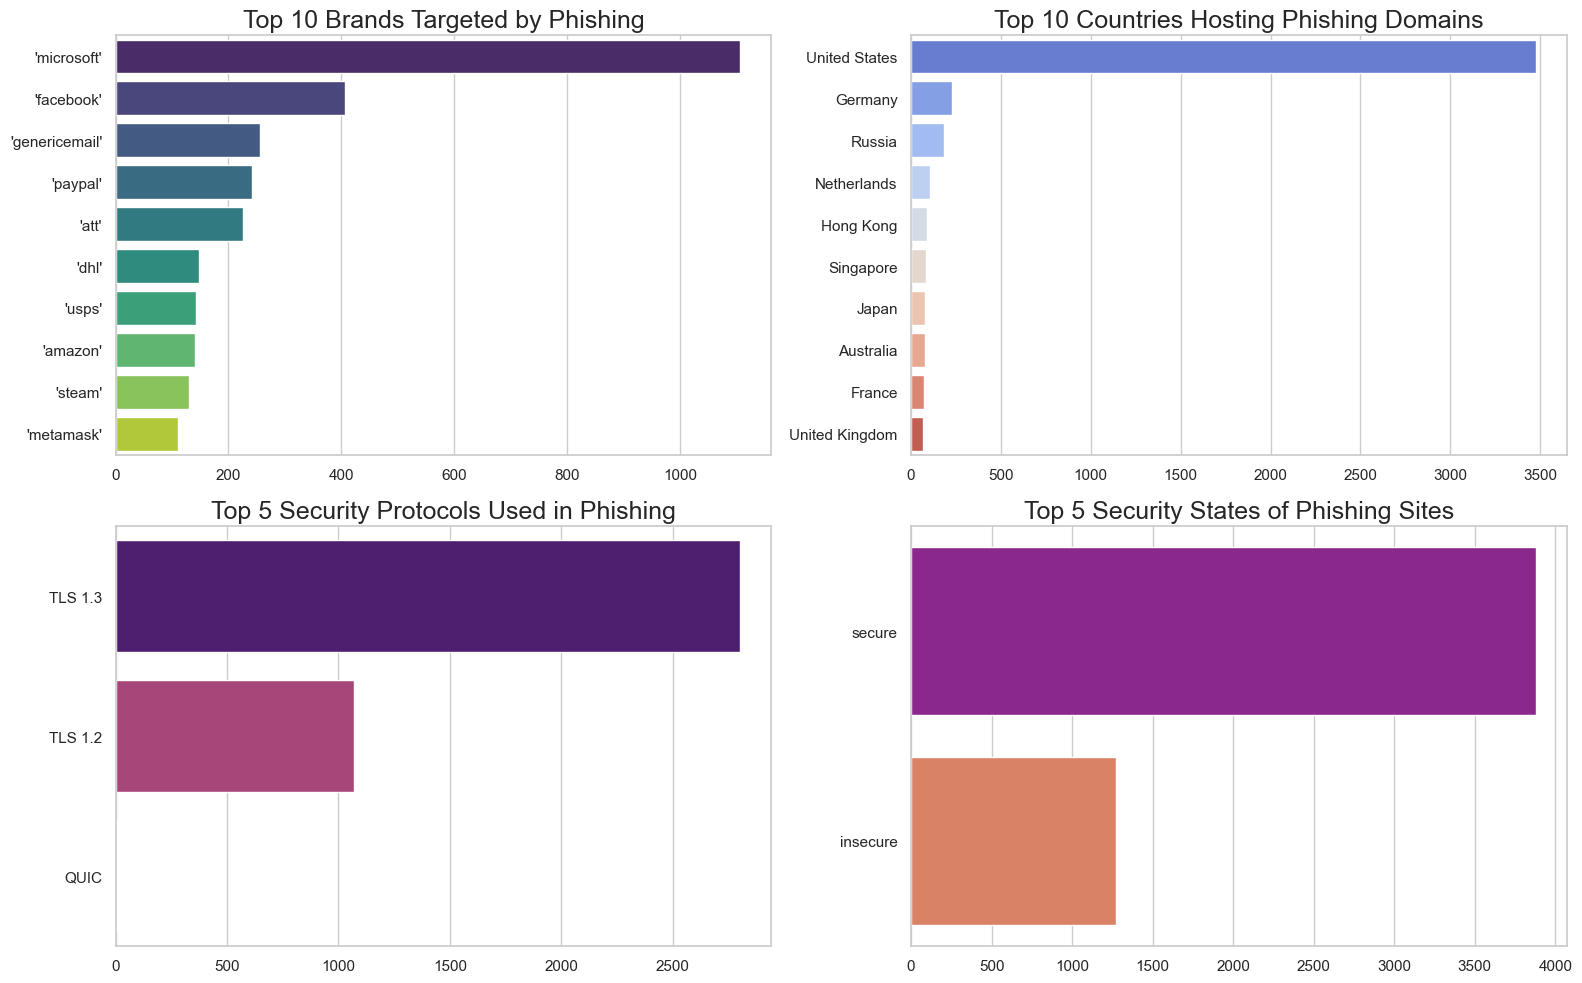

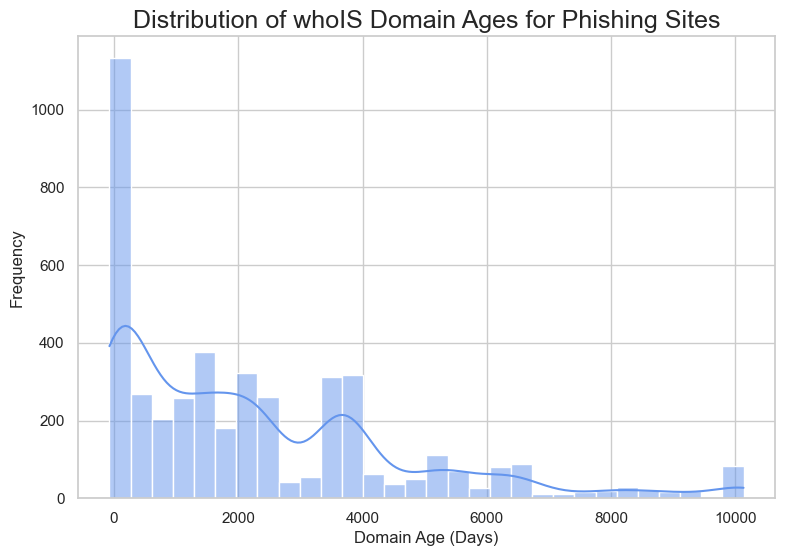

In [24]:
# Set up plotting aesthetics
sns.set_theme(style="whitegrid")
plt.figure(figsize=(16, 10))

# Analysis 6: Brand and Domain Analysis
# Count the frequency of each brand mentioned in the 'brands' column

# Ensure the 'brands' column is treated as a string to handle any non-string values properly
phishingData['brands'] = phishingData['brands'].astype(str)
phishingData['brands'] = phishingData['brands'].str.strip('[]').str.replace('"', '').str.split(',')

# Re-calculate brand frequencies for top 10 brands
brand_counts = phishingData['brands'].explode().value_counts().head(10)

# Plotting the top 10 brands
plt.subplot(2, 2, 1)
sns.barplot(x=brand_counts.values, y=brand_counts.index, palette="viridis")
plt.title("Top 10 Brands Targeted by Phishing", fontsize=18)

# Analysis 7: Geolocation Analysis
# Count the frequency of phishing attempts by country
country_counts = phishingData['remote_ip_country'].value_counts().head(10)  # Top 10 countries

# Plotting the top 10 countries
plt.subplot(2, 2, 2)
sns.barplot(x=country_counts.values, y=country_counts.index, palette="coolwarm")
plt.title("Top 10 Countries Hosting Phishing Domains", fontsize=18)

# Analysis 8: Security Protocol Analysis
# Count the frequency of different security states and protocols
security_protocol_counts = phishingData['security_protocol'].value_counts().head(5)  # Top 5 security protocols
security_state_counts = phishingData['security_state'].value_counts().head(5)  # Top 5 security states

# Plotting security protocols
plt.subplot(2, 2, 3)
sns.barplot(x=security_protocol_counts.values, y=security_protocol_counts.index, palette="magma")
plt.title("Top 5 Security Protocols Used in Phishing", fontsize=18)

# Plotting security states
plt.subplot(2, 2, 4)
sns.barplot(x=security_state_counts.values, y=security_state_counts.index, palette="plasma")
plt.title("Top 5 Security States of Phishing Sites", fontsize=18)

plt.tight_layout()
plt.savefig('figures/Top_feature_analyses.png', dpi=300)
plt.show()
plt.close(); 

# Analysis 9: Domain Age Analysis
# Removing NaN values in whois_domain_age for analysis and converting to integer
domain_age_cleaned = phishingData['whois_domain_age'].dropna()
plt.figure(figsize=(9, 6))
sns.histplot(domain_age_cleaned, kde=True, bins=30, color="cornflowerblue")
plt.title("Distribution of whoIS Domain Ages for Phishing Sites", fontsize=18)
plt.xlabel("Domain Age (Days)")
plt.ylabel("Frequency")
plt.savefig('figures/Distribution_of_domain_age.png', dpi=300)
plt.show()
plt.close(); # to free up space

## ANOTHER APPROACH FOR TASK 1 to 5

In [40]:

phishing_data = phishingData.dropna(subset=['security_state', 'whois_domain_age', 'features.html', 'domain'])

# Define detection logic for phishing (simple heuristic)
def is_phishing(row):
    # Based on SSL validity, domain age, and suspicious keywords in `features.html`
    expired_cert = (
        pd.notna(row['security_valid_to']) and
        pd.to_datetime(row['security_valid_to']).tz_localize(None) < datetime.now()
    )
    domain_age_suspicious = pd.notna(row['whois_domain_age']) and float(row['whois_domain_age']) < 90
    has_suspicious_content = any(
        keyword in row['features.html'].lower()
        for keyword in ["password", "login", "verify", "account", "urgent", "suspended"]
    )
    
    # Classify as phishing if expired certificate, suspicious domain age, or suspicious content is found
    return int(expired_cert or domain_age_suspicious or has_suspicious_content)

# Apply phishing detection heuristic
phishing_data['predicted_phishing'] = phishing_data.apply(is_phishing, axis=1)

# Calculate Detection Rate
detection_rate = phishing_data['predicted_phishing'].mean() * 100
print(f"Detection Rate: {detection_rate:.2f}%")

# Define legitimate domains for False Positive analysis
legitimate_domains = ["microsoft.com", "google.com", "apple.com", "amazon.com", "paypal.com"]

# False Positive calculation
phishing_data['legitimate_domain'] = phishing_data['domain'].apply(
    lambda x: any(ld in x for ld in legitimate_domains)
)
false_positives = phishing_data[(phishing_data['legitimate_domain'] == True) & (phishing_data['predicted_phishing'] == 1)]
false_positive_rate = len(false_positives) / phishing_data['legitimate_domain'].sum() * 100
print(f"False Positive Rate: {false_positive_rate:.2f}%")

# Device Type Approximation (if possible)
def device_type(folder_path):
    if any(mobile in folder_path.lower() for mobile in ["mobile", "android", "ios"]):
        return "Mobile"
    elif any(desktop in folder_path.lower() for desktop in ["desktop", "windows", "mac"]):
        return "Desktop"
    return "Unknown"

phishing_data['device_type'] = phishing_data['folder_path'].apply(device_type)
device_usage = phishing_data['device_type'].value_counts(normalize=True) * 100
print("Device Type Usage:")
print(device_usage)


Detection Rate: 82.78%
False Positive Rate: 75.00%
Device Type Usage:
device_type
Unknown    100.0
Name: proportion, dtype: float64


/var/folders/zm/rn7sz8ds2mv7_2kt1crb12pc0000gn/T/ipykernel_85991/841288773.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phishing_data['predicted_phishing'] = phishing_data.apply(is_phishing, axis=1)
/var/folders/zm/rn7sz8ds2mv7_2kt1crb12pc0000gn/T/ipykernel_85991/841288773.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phishing_data['legitimate_domain'] = phishing_data['domain'].apply(
/var/folders/zm/rn7sz8ds2mv7_2kt1crb12pc0000gn/T/ipykernel_85991/841288773.py:45: SettingWithCopyWarning: 
A 

/var/folders/zm/rn7sz8ds2mv7_2kt1crb12pc0000gn/T/ipykernel_85991/627872709.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phishing_data['predicted_phishing'] = phishing_data.apply(is_phishing, axis=1)
/var/folders/zm/rn7sz8ds2mv7_2kt1crb12pc0000gn/T/ipykernel_85991/627872709.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phishing_data['legitimate_domain'] = phishing_data['domain'].apply(


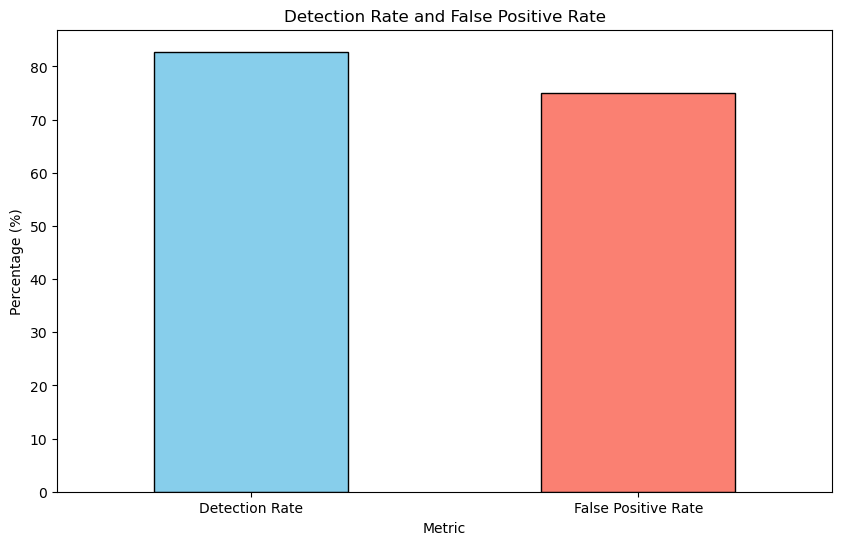

In [49]:
# Clean data, drop rows with missing key columns
phishing_data = phishingData.dropna(subset=['security_state', 'whois_domain_age', 'features.html', 'domain'])

# Define detection logic for phishing (simple heuristic)
def is_phishing(row):
    # Based on SSL validity, domain age, and suspicious keywords in `features.html`
    expired_cert = (
        pd.notna(row['security_valid_to']) and
        pd.to_datetime(row['security_valid_to']).tz_localize(None) < datetime.now()
    )
    domain_age_suspicious = pd.notna(row['whois_domain_age']) and float(row['whois_domain_age']) < 90
    has_suspicious_content = any(
        keyword in row['features.html'].lower()
        for keyword in ["password", "login", "verify", "account", "urgent", "suspended"]
    )
    
    # Classify as phishing if expired certificate, suspicious domain age, or suspicious content is found
    return int(expired_cert or domain_age_suspicious or has_suspicious_content)

# Apply phishing detection heuristic
phishing_data['predicted_phishing'] = phishing_data.apply(is_phishing, axis=1)

# Calculate Detection Rate
detection_rate = phishing_data['predicted_phishing'].mean() * 100

# Define legitimate domains for False Positive analysis
legitimate_domains = ["microsoft.com", "google.com", "apple.com", "amazon.com", "paypal.com"]

# False Positive calculation
phishing_data['legitimate_domain'] = phishing_data['domain'].apply(
    lambda x: any(ld in x for ld in legitimate_domains)
)
false_positives = phishing_data[(phishing_data['legitimate_domain'] == True) & (phishing_data['predicted_phishing'] == 1)]
false_positive_rate = len(false_positives) / phishing_data['legitimate_domain'].sum() * 100

# Plot Detection Rate and False Positive Rate
plt.figure(figsize=(10, 6))
rates = pd.Series([detection_rate, false_positive_rate], index=["Detection Rate", "False Positive Rate"])
rates.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')
plt.title("Detection Rate and False Positive Rate")
plt.xlabel("Metric")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)
plt.show()


In [46]:
phishing_data = phishingData.dropna(subset=['protocol', 'whois_domain_age'])

# Define a threshold for suspicious domain age (e.g., less than 90 days)
suspicious_domain_age_threshold = 90

# Define a function to approximate response based on protocol and domain age
def infer_response(row):
    # Check if protocol is insecure (http)
    insecure_protocol = row['protocol'].lower() == 'http'
    
    # Check if domain age is suspiciously low
    suspicious_domain_age = pd.notna(row['whois_domain_age']) and float(row['whois_domain_age']) < suspicious_domain_age_threshold
    
    # Assume a "correct response" if either condition indicates potential phishing risk
    return int(insecure_protocol or suspicious_domain_age)

# Apply the function to create a 'response_action' column
phishing_data['response_action'] = phishing_data.apply(infer_response, axis=1)

# Calculate Proxy Response Rate
response_rate = phishing_data['response_action'].mean() * 100
print(f"Proxy Response Rate: {response_rate:.2f}%")

Proxy Response Rate: 18.78%


/var/folders/zm/rn7sz8ds2mv7_2kt1crb12pc0000gn/T/ipykernel_85991/2488504907.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phishing_data['response_action'] = phishing_data.apply(infer_response, axis=1)


/var/folders/zm/rn7sz8ds2mv7_2kt1crb12pc0000gn/T/ipykernel_85991/3385529634.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phishing_data['response_action'] = phishing_data.apply(infer_response, axis=1)


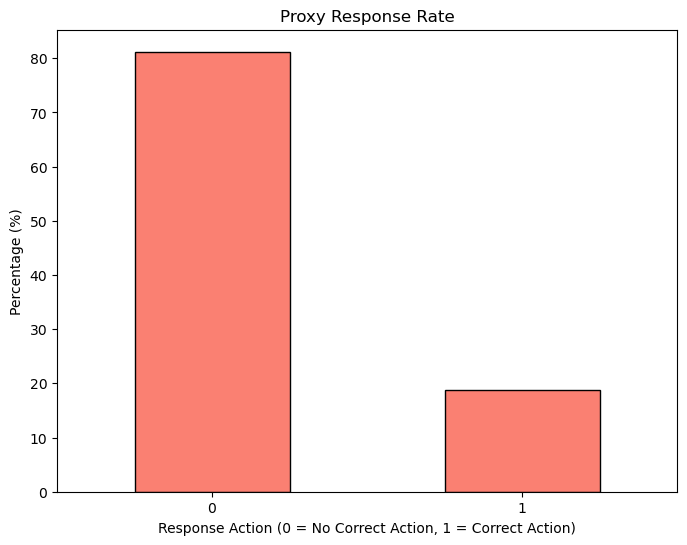

In [48]:
phishing_data = phishingData.dropna(subset=['protocol', 'whois_domain_age'])

# Define a threshold for suspicious domain age (e.g., less than 90 days)
suspicious_domain_age_threshold = 90

# Define a function to approximate response based on protocol and domain age
def infer_response(row):
    # Check if protocol is insecure (http)
    insecure_protocol = row['protocol'].lower() == 'http'
    
    # Check if domain age is suspiciously low
    suspicious_domain_age = pd.notna(row['whois_domain_age']) and float(row['whois_domain_age']) < suspicious_domain_age_threshold
    
    # Assume a "correct response" if either condition indicates potential phishing risk
    return int(insecure_protocol or suspicious_domain_age)

# Apply the function to create a 'response_action' column
phishing_data['response_action'] = phishing_data.apply(infer_response, axis=1)

# Verify that 'response_action' column is created
if 'response_action' in phishing_data.columns:
    # Calculate Proxy Response Rate
    proxy_response_rate = phishing_data['response_action'].value_counts(normalize=True) * 100

    # Plot Proxy Response Rate
    plt.figure(figsize=(8, 6))
    proxy_response_rate.plot(kind='bar', color='salmon', edgecolor='black')
    plt.title("Proxy Response Rate")
    plt.xlabel("Response Action (0 = No Correct Action, 1 = Correct Action)")
    plt.ylabel("Percentage (%)")
    plt.xticks(rotation=0)
    plt.show()
else:
    print("Error: 'response_action' column not created.")


## Device Type Usage: Proportion of mobile vs. desktop interactions.

Device Type Usage:
device_type
Unknown    91.341487
Mobile      6.950107
Desktop     1.708406
Name: proportion, dtype: float64


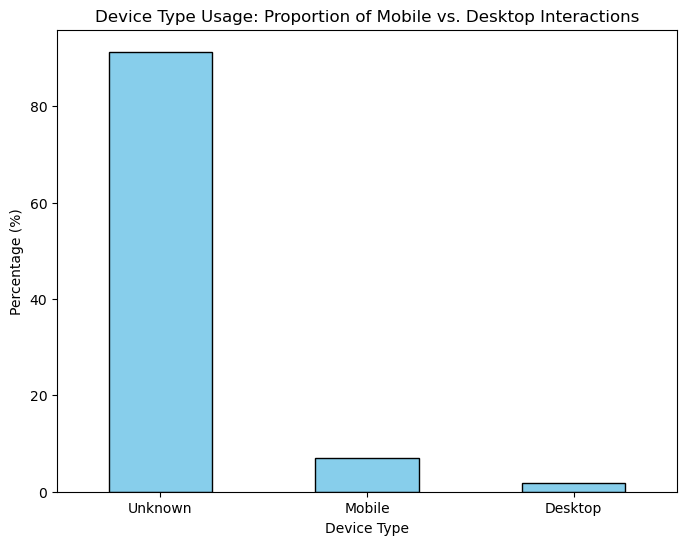

In [44]:
phishing_data = phishingData.dropna(subset=['domain'])

# Define keywords for mobile and desktop based on common patterns
mobile_indicators = ["m.", "/mobile", "android", "ios"]
desktop_indicators = ["desktop", "windows", "mac"]

# Define a function to classify device type based on URL pattern
def classify_device_type(domain):
    domain = domain.lower()
    if any(keyword in domain for keyword in mobile_indicators):
        return "Mobile"
    elif any(keyword in domain for keyword in desktop_indicators):
        return "Desktop"
    return "Unknown"

# Apply function to classify device type
phishing_data['device_type'] = phishing_data['domain'].apply(classify_device_type)

# Calculate Device Type Usage
device_type_usage = phishing_data['device_type'].value_counts(normalize=True) * 100
print("Device Type Usage:")
print(device_type_usage)


# Plot Device Type Usage
plt.figure(figsize=(8, 6))
device_type_usage.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Device Type Usage: Proportion of Mobile vs. Desktop Interactions")
plt.xlabel("Device Type")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)
plt.show()